In [107]:
# !unzip archive.zip

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('laptop_data.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [110]:
data.duplicated().sum()

1

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [112]:
Categorical_Col = []
Numercal_Col = []

for col in data.columns:
    if data[col].dtype == 'object':
        Categorical_Col.append(col)
        
    else:
        Numercal_Col.append(col)

In [113]:
Categorical_Col

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [114]:
Numercal_Col

['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

In [115]:
for col in Categorical_Col:
    print(data[col].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
['Intel' 'AMD' 'Nvidia']
['Mac' 'Others' 'Windows']


In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column and replace the original column
for col in Categorical_Col:
    data[col] = label_encoder.fit_transform(data[col])

# Now create dummy variables from the label encoded columns
encoded_data = pd.get_dummies(data, columns=Categorical_Col, drop_first=True)

# Now you can proceed with your data analysis or modeling
encoded_data.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_1,Company_2,...,TypeName_4,TypeName_5,Cpu_brand_1,Cpu_brand_2,Cpu_brand_3,Cpu_brand_4,Gpu_brand_1,Gpu_brand_2,Os_1,Os_2
0,8,1.37,11.175755,0,1,226.983005,0,128,True,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,10.776777,0,0,127.677940,0,0,True,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,10.329931,0,0,141.211998,0,256,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,11.814476,0,1,220.534624,0,512,True,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,11.473101,0,1,226.983005,0,256,True,False,...,True,False,False,True,False,False,True,False,False,False


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   int64  
 1   TypeName     1273 non-null   int64  
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   int64  
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   int64  
 12  Os           1273 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 129.4 KB


/home/mohamedismail/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


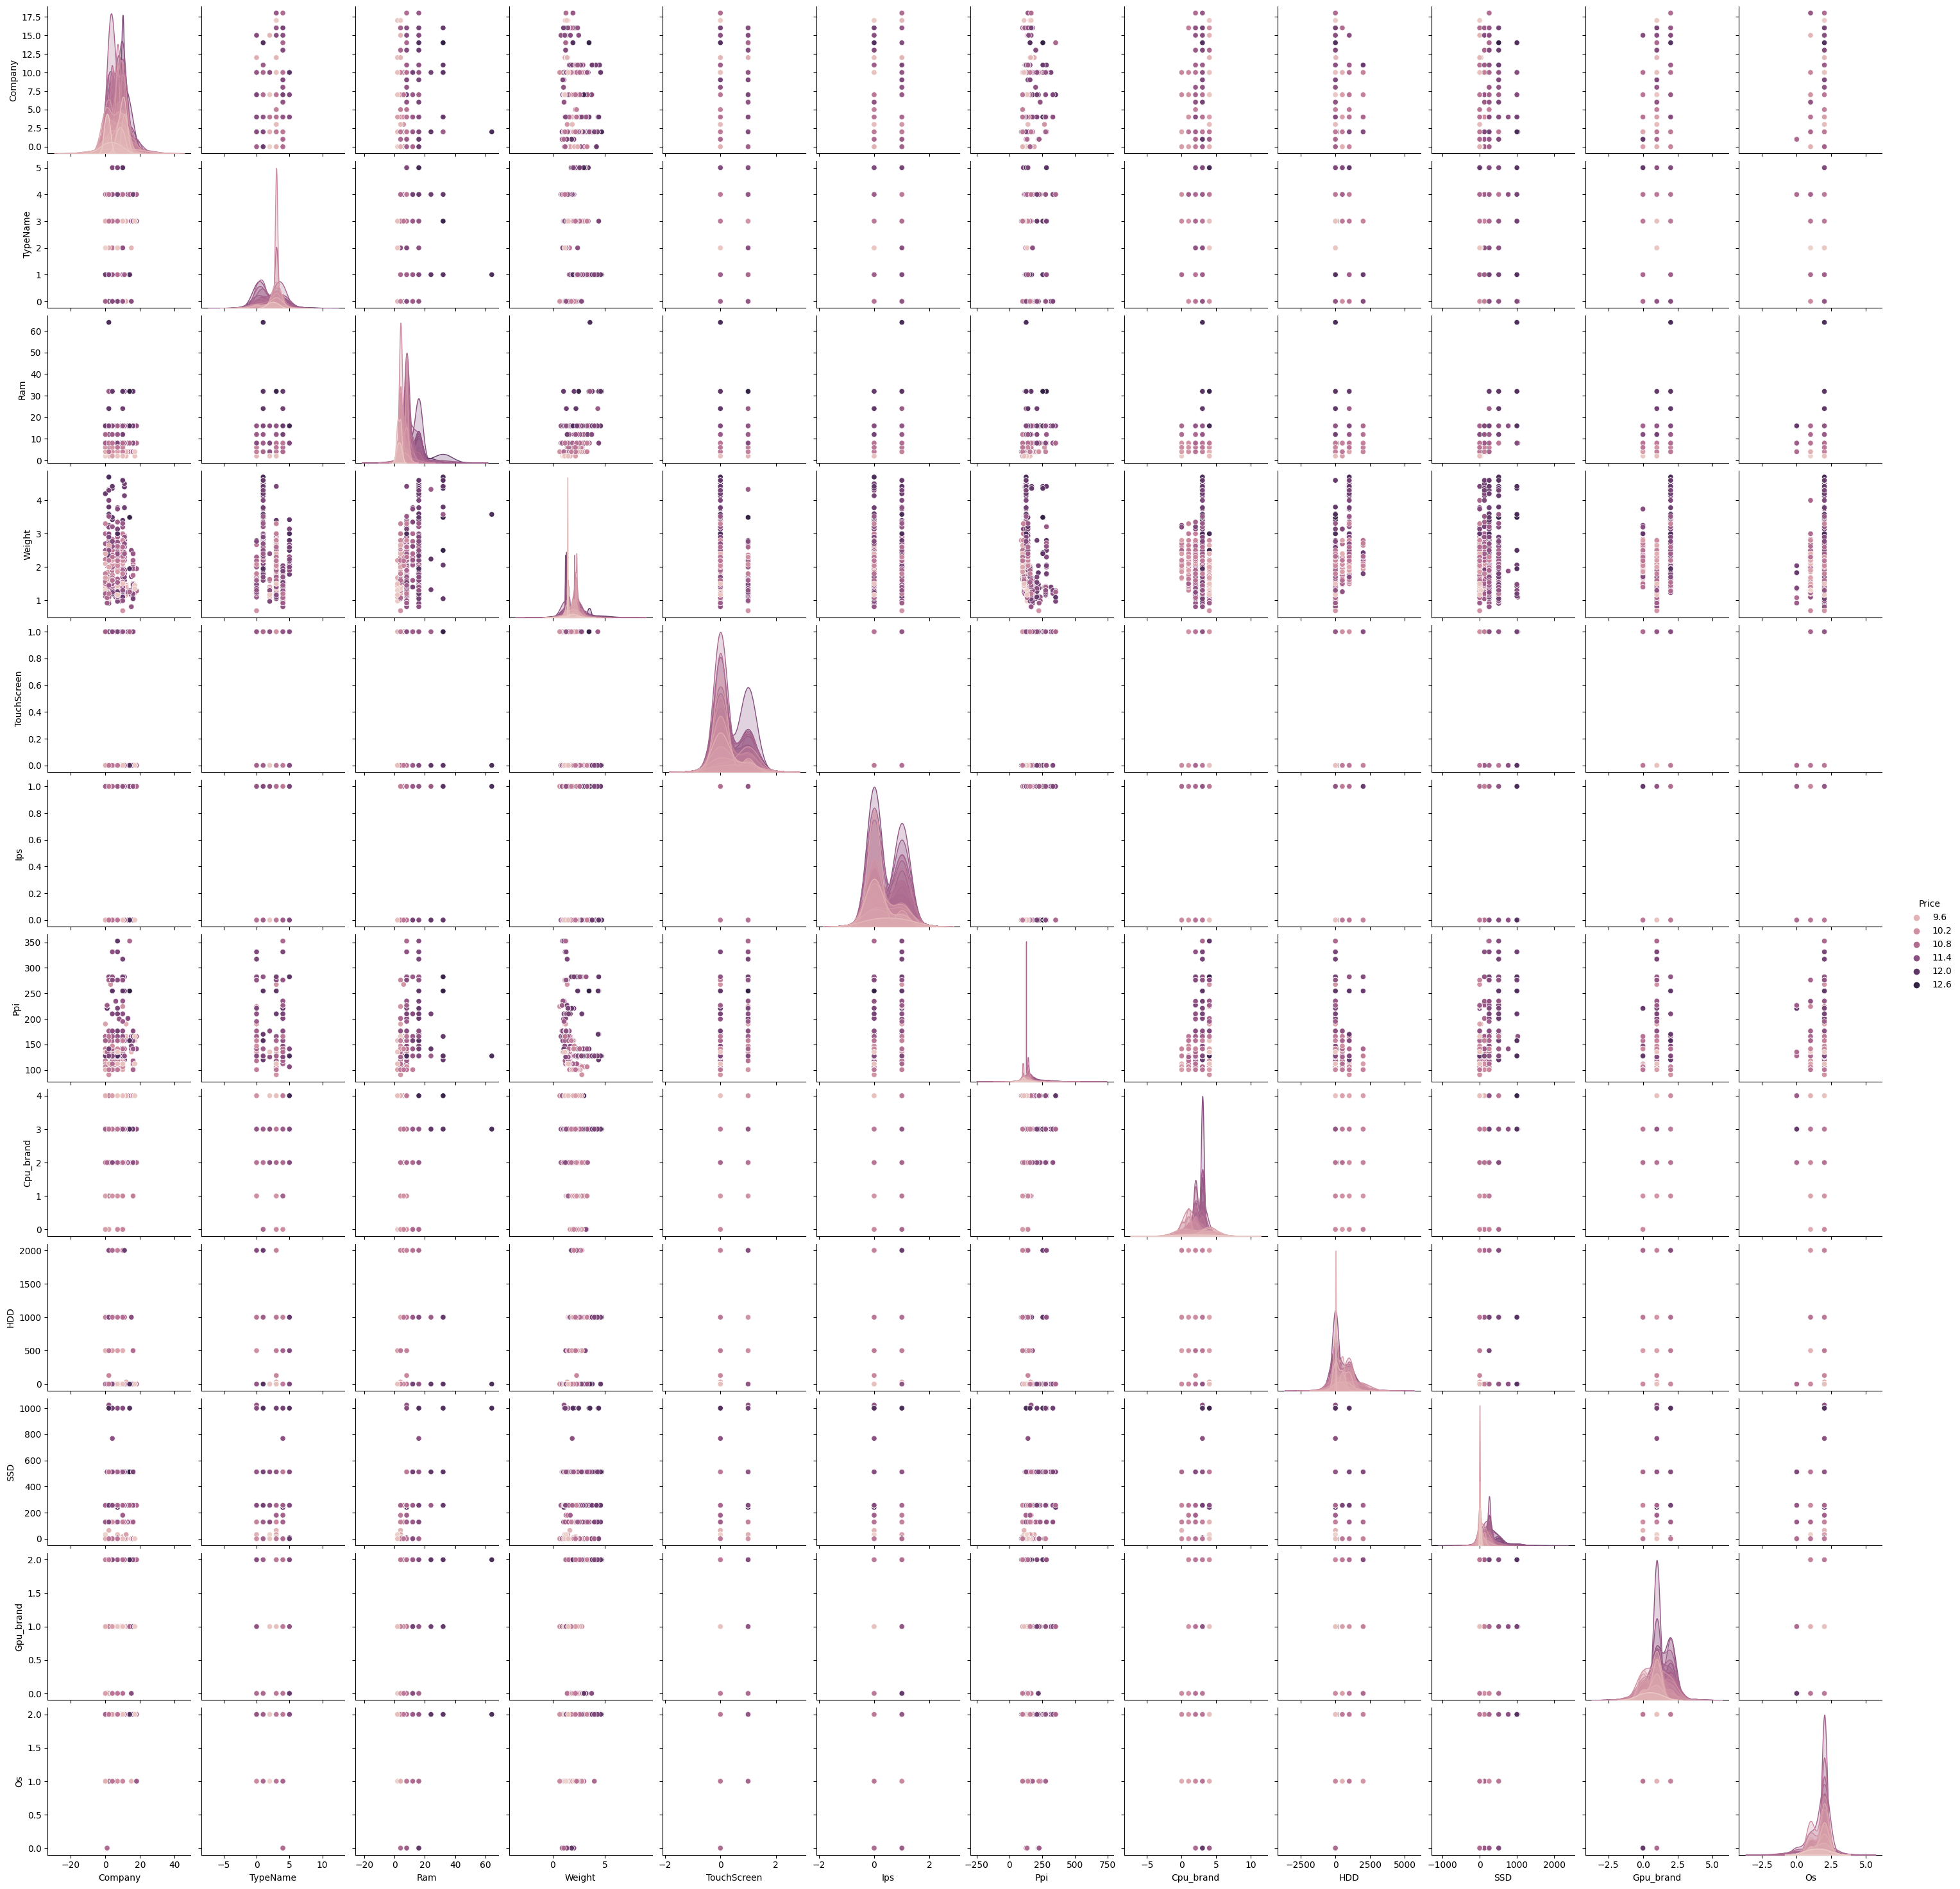

In [118]:
sns.pairplot(data,hue='Price')
plt.show()

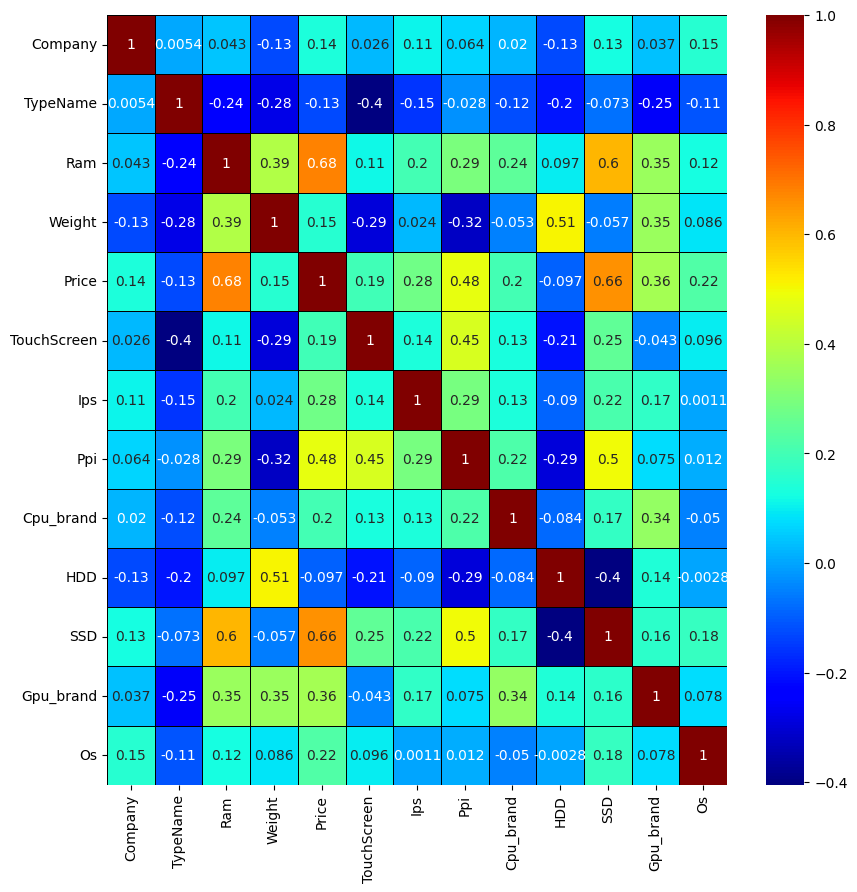

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='jet',linecolor='black',linewidths=0.5)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='Price',axis=1)
X.head()

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,0,1,226.983005,2,0,256,1,0


In [121]:
Y = data['Price']
Y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)


In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [124]:
y_predict = model.predict(X_test)

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))



0.29476089315857623
0.13160871986109887


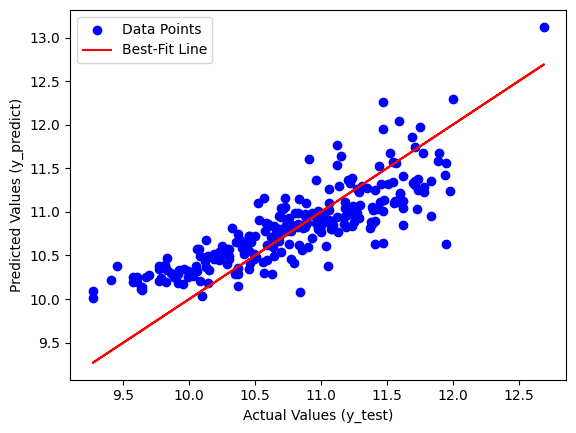

In [128]:
# Plotting the best-fit line
plt.scatter(y_test, y_predict, color='blue', label='Data Points')
plt.plot(y_test, y_test, color='red', label='Best-Fit Line')

# Add labels and a legend to the plot
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predict)')
plt.legend()

# Show the plot
plt.show()

In [127]:
Accurcy = model.score(X_train,y_train)
print("Accurcy: ",round(Accurcy * 100),"%")

Accurcy:  63 %
